# Import library

In [64]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys  # import KEYS 
import time
import matplotlib.pyplot as plt
import pandas as pd


#### Opening webdriver using selenium 

In [65]:
driver=webdriver.Chrome(executable_path = 'C:/Users\itzone\Downloads\Chromedriver')
driver.get('https://www.instagram.com/')
user_name_1='UserName'
password_1='password'

# login Instagram Handle

In [66]:
time.sleep(2)
#In this section login to instagram handle
def login(user_name_1,password_1):
    wait=WebDriverWait(driver,10)
    user_name=wait.until(EC.presence_of_element_located( (By.NAME, 'username') ))
    user_name.send_keys(user_name_1)#passing name
    password=driver.find_element_by_name('password')#Passing password
    password.send_keys(password_1)
    password.submit()
login(user_name_1,password_1)

# Searching for given hanlde Or User_name

In [67]:
def search_query(key):
    searchs=driver.find_element_by_xpath('//div[@class="pbgfb Di7vw "]/div')
    searchs.click()
    searchs=driver.find_element_by_xpath('//div[@class="LWmhU _0aCwM"]/input')
    searchs.send_keys(key)

# Searching & Opening of profile

In [68]:
def get_profile(handle):
    search_query(handle)
    wait = WebDriverWait(driver,20) #Imports done previously. no need to do again
    profile= wait.until(EC.presence_of_element_located( (By.CLASS_NAME,'Ap253') ))
    profile.click()

# Following HANDLE/PROFILE 

In [6]:
def follow_pr(handle):
    get_profile(handle)
    follow= driver.find_element_by_tag_name('button')
    if follow.get_attribute('innerHTML')=='Follow':
        follow.click()
    else:
        print('already Following')

# Unfollowing Handle\Profile

In [7]:
def unfollow_pr(handle):
    get_profile(handle)
    unfollow= driver.find_element_by_xpath('//span[contains(@class,"glyphsSpriteFriend_Follow u-__7")]')
    unfollow.click()
    unfollow_button=driver.find_element_by_xpath('//button[contains(@class,"aOOlW -Cab_   ")]')
    print(unfollow_button.get_attribute('innerHTML'))
    unfollow_button.click()

# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
From the list of instagram handles you obtained when you searched ‘food’ in previous project. 

Open the first 10 handles and find the top 5 which have the highest number of followers

Now Find the number of posts these handles have done in the previous 3 days.

Depict this information using a suitable graph.

In [70]:
#Getting list of top 10 instagran Handle starting with food
#In This Section We are getting list of instagram handloe using search_query which is wriiten in above code.
# and after that extracting user name of all handles which consist of substring "food"
def list_handles(handle):
    search_query(handle)
    wait = WebDriverWait(driver,20)
    food= wait.until(EC.presence_of_all_elements_located( (By.CLASS_NAME,'Ap253') ))
    list_handless=[]
    for i in food:
        t=i.get_attribute('innerHTML')
        if t[0]=='#':# for removing # if it is present at intials
            list_handless.append(t[1:])
        else:
            list_handless.append(t)
    return list_handless 
list_handless= list_handles('food')
driver.back()

In [71]:
#In this section we will extract no of followers of top 10 handle
#In below code i have passed dictionary Where Name='key'&& Follower='value'
#Used get_profile function for getting profile
def no_follower(handle,handle_follower):
    get_profile(handle)
    wait = WebDriverWait(driver,20)
    follower= wait.until(EC.presence_of_all_elements_located( (By.CLASS_NAME,'g47SY ') ))
    follower=follower[1]
## Title is present at Index 2 
    t=follower.get_attribute('title')
    t = t.replace(',', '')## Here removing comma to convert it in to integer so that we can sort
    handle_follower[handle]=int(t)
    driver.back()
handle_follower={}
for l in range(10):
    no_follower(list_handless[l],handle_follower)
    time.sleep(3)

In [72]:
# In this section we are getting Top '5' handles on the basis of followers in descending Order in list
from heapq import nlargest 
Top_5_handle= nlargest(5, handle_follower, key = handle_follower.get) 
Top_5_handle

['foodnetwork', 'buzzfeedfood', 'yourfoodlab', 'food', 'foodrush.recipe']

# Below we will find no of post which have been posted by these handle within '3' days

In [83]:
#Below function is used to find no of post's within three days
def Print_count(handle,no_of_posts):
    j=False
    lens=0
    get_profile(handle)
    wait= WebDriverWait(driver,20)
    current_height = driver.execute_script('return document.body.scrollHeight;')
    while True:
        post=driver.find_elements_by_class_name('_9AhH0')
        for i in post:
            i.click()
            wait= WebDriverWait(driver,20)
            time=like_btn=wait.until(EC.presence_of_element_located( (By.XPATH,'//time[@class="_1o9PC Nzb55"]') ))
            ##print(time.get_attribute('outerHTML'))
            data = BeautifulSoup(driver.page_source,'lxml')
            day_hour=data.time.text## it is giving us day how much ago  handle posted that pic
            if day_hour[-1]=='h'or day_hour[-1]=='m':## 'h' it's for hour & 'm' for minute
                lens=lens+1#for calculatiing no of posts
            elif day_hour[-1]=='d':#'d' for day
                if day_hour[0]<='3':
                    lens=lens+1# for calculating no of posts 
                else :
                    j=True
                    break
            else :
                j=True
                break;
            wait= WebDriverWait(driver,20)#finding close button
            close_post_btn=wait.until(EC.presence_of_element_located( (By.XPATH,'//div[contains(@class,"_2dDPU")]/div[3]/button') ))
            close_post_btn.click()
            driver.back() 
        if j==True:
            driver.back() 
            break
        #below we are scroling down page
        current_height = driver.execute_script('return document.body.scrollHeight;')
        driver.execute_script('window.scrollTo(0,arguments[0]);' , current_height)
    no_of_posts.append(lens)
    driver.back()
no_of_posts=[]
for i in Top_5_handle:#Top_5_handle it contains top 5 handle with their follower
    Print_count(i,no_of_posts)

# Depict this information using a suitable graph.

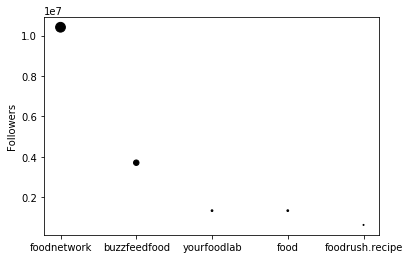

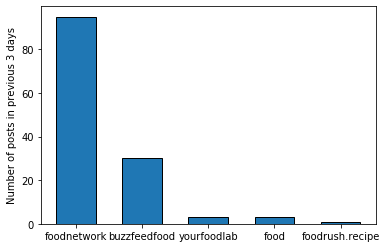

In [84]:

# all imports at top of file
handle_follower
no_of_follower=[]## This list give u no of follwer according top_5_handle
for i in Top_5_handle:
    no_of_follower.append(handle_follower[i])

plt.scatter(Top_5_handle, no_of_follower, s=no_of_posts, c='black')
plt.ylabel("Followers")
plt.show()
plt.bar(Top_5_handle,no_of_posts, width=0.6, edgecolor='black')
plt.ylabel("Number of posts in previous 3 days")
plt.show()

# 2) Your friend also needs a list of hashtags that he should use in his posts.
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

3.Create a csv file with two columns : the word and its frequency

4.Now, find the hashtags that were most popular among these bloggers

5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

### 1)Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [96]:
#Below code help us to find all content of given post in this section we are taking 10 post of top 5 handles
def all_contents(handle,post_handle):
    time.sleep(1)
    nf_content=[]#it contains contents of 10 posts
    get_profile(handle)# This function help us to open given handle
    length=0
    post=driver.find_elements_by_class_name('_9AhH0')#this function help us to find post ans click on it open
    for i in post:
        i.click()
        wait= WebDriverWait(driver,20)
        comment=wait.until(EC.presence_of_element_located( (By.CLASS_NAME,'PdwC2.fXiEu.s2MYR') ))
        data = BeautifulSoup(str(comment.get_attribute('outerHTML')),'lxml')
        nf_content.append(data.get_text())
        length=length+1
        wait= WebDriverWait(driver,20)#finding close button
        close_post_btn=wait.until(EC.presence_of_element_located( (By.XPATH,'//div[contains(@class,"_2dDPU")]/div[3]/button') ))
        close_post_btn.click()#this click is used to click the close the post
        if length>=10:
            post_handle.append(nf_content) # This contain list of contents of each handles 
            driver.back()
            break
        time.sleep(3)# making sleep due to some exception
post_handle=[]
for i in Top_5_handle:
    print(i)
    all_contents(i,post_handle)
    driver.back()
for i in post_handle:
    print(i[0])
    print(i[1])

yourfoodlab
foodrush.recipe
dilsefoodie
foodtalkindia
delhifoodguide
yourfoodlabVerified•FollowLiked by best_creation_of_god_ and othersyourfoodlabVerifiedMumbai Style Sandwich by Chef @sanjyotkeerAs a kid I have grown up in Mumbai and there would not be a single week were I haven’t had a sada sandwich or a toast sandwich. Followed by a bread butter chutney and that extra piece of boiled potato with some sandwich masala😜. I remember so many conversations which have happened over these sandwiches 🙈 so many memories and as a kid I used to try and replicate the recipe at home. I still remember telling mom to buy me the street style toaster and I used to try and make this recipe at home just like how the really talented sandwich chefs did it on the streets. This recipe is a result of so many trials and it took me quite a while to crack the sandwich masala and the perfect chutney recipe! So enjoy this one and I am sure you all will love it!!!!! The famous “Bombay Masala Toast Sandwich” will

# 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.


In [97]:
def get_words_list(post_contents):
    words_list = []
    for i in range(5):
        for j in range(10): # bcz we scrape 10 posts of each 5 insta handles
            scraped_content = post_contents[i][j] # j post content of ith handle
            scraped_list = scraped_content.strip().split()
            for word in scraped_list:
                words_list.append(word)
    return words_list

words_list = get_words_list(post_handle)

# Store frequency of each word
word_freq = {}
for word in words_list:
    word_freq[word] = word_freq.get(word, 0) + 1
    
# Print words wit their frequency
for i in list(word_freq.items()):
    print(i)

('yourfoodlabVerified•FollowLiked', 8)
('by', 59)
('best_creation_of_god_', 1)
('and', 180)
('othersyourfoodlabVerifiedMumbai', 1)
('Style', 4)
('Sandwich', 2)
('Chef', 7)
('@sanjyotkeerAs', 1)
('a', 99)
('kid', 4)
('I', 63)
('have', 25)
('grown', 2)
('up', 13)
('in', 67)
('Mumbai', 7)
('there', 7)
('would', 5)
('not', 14)
('be', 17)
('single', 2)
('week', 4)
('were', 6)
('haven’t', 2)
('had', 7)
('sada', 2)
('sandwich', 12)
('or', 16)
('toast', 5)
('sandwich.', 2)
('Followed', 2)
('bread', 3)
('butter', 8)
('chutney', 7)
('that', 19)
('extra', 4)
('piece', 2)
('of', 89)
('boiled', 2)
('potato', 2)
('with', 60)
('some', 12)
('masala😜.', 2)
('remember', 9)
('so', 30)
('many', 13)
('conversations', 2)
('which', 13)
('happened', 2)
('over', 3)
('these', 8)
('sandwiches', 3)
('🙈', 2)
('memories', 4)
('as', 9)
('used', 9)
('to', 116)
('try', 18)
('replicate', 2)
('the', 125)
('recipe', 39)
('at', 20)
('home.', 4)
('still', 3)
('telling', 3)
('mom', 2)
('buy', 2)
('me', 17)
('street', 4)
('s

# 3.Create a csv file with two columns : the word and its frequency

In [101]:
columns = ['Word', 'Frequency']
word_freq_list = list(word_freq.items())
dataframe = pd.DataFrame(word_freq_list, columns = columns)
# Create csv
dataframe.to_csv('Word_Freq.csv')
dataframe.head(10)

,Word,Frequency
0,yourfoodlabVerified•FollowLiked,8
1,by,59
2,best_creation_of_god_,1
3,and,180
4,othersyourfoodlabVerifiedMumbai,1
5,Style,4
6,Sandwich,2
7,Chef,7
8,@sanjyotkeerAs,1
9,a,99


# Now, find the hashtags that were most popular among these bloggers

In [102]:
# from above words_list we search for hashtags
def get_hashtags(words_list): # Returns a list of hashtags
    hashtags = []
    for word in words_list:
        if word.strip()[0]=='#':
            hashtags.append(word.strip())
    return hashtags

def get_hashtag_freq(hashtags): # this function return dictionary of hashtags and their frequency
    hash_freq = {}
    for tag in hashtags:
        hash_freq[tag] = hash_freq.get(tag,0)+1
    return hash_freq


# calling functions
hashtags = get_hashtags(words_list)
hash_freq = get_hashtag_freq(hashtags)

# Now we find top 5 hashtags and their frequency
hash_freq_list = list(hash_freq.items())
hash_freq_list.sort(key=lambda x:x[1]) # in increasing order of frequency
hash_freq_list = hash_freq_list[::-1] # in decreasing order of frequency

# Print 
for i in hash_freq_list:
    print(i)

('#foodie', 7)
('#indiancuisine', 5)
('#contestalert', 4)
('#streetfood', 3)
('#CookWithATwist', 3)
('#comfortfood', 2)
('#mumbaistreetfood', 2)
('#foodstagram', 2)
('#foodiesofinstagram', 2)
('#MorphyRichards', 2)
('#sanjyotkeer', 2)
('#staysafe', 2)
('#mayapuri#delhifoodguide11wchefoodsrominasy😍😍😍11wReplysleepyhead_21@piyushrawat20', 1)
('#HomeCooking3wthe_chefiatureThis', 1)
('#StuffedMangoKulfi', 1)
('#MustTryPlace.Location', 1)
('#saynotocorona5d41', 1)
('#farzi', 1)
('#AlwaysInToMixIn', 1)
('#IrishWhiskey', 1)
('#Jameson', 1)
('#HomeGrown1daditichengappaVerifiedLoved', 1)
('#supportsmallbusiness', 1)
('#GalaxyA514dvikasdeep1616Follow', 1)
('#GalaxyA31', 1)
('#AwesomeCity', 1)
('#AwesomenessWithSamsung', 1)
('#dilsefoodie3dpujasakhlaBhai', 1)
('#chutiya', 1)
('#dilsefoodie2dkaran.kakkar.9The', 1)
('#cookies2wjagfoodieNice!', 1)
('#celebrations', 1)
('#rakhi', 1)
('#rakshabandhan', 1)
('#chocolicious', 1)
('#fried', 1)
('#doughnuts', 1)
('#surprise', 1)
('#darkfantasy', 1)
('#siste

# 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

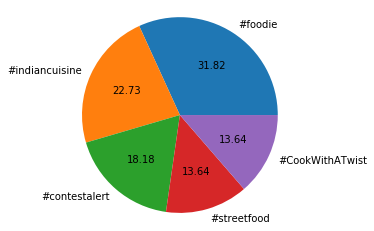

In [106]:
# first we get top 5 hashtags and their frequency using above hash_freq_list
top_5_hashtags = []
top_5_hashtags_freq = []
for i in range(5):
    top_5_hashtags.append(hash_freq_list[i][0])
    top_5_hashtags_freq.append(hash_freq_list[i][1])
# Now plot pie chart
plt.pie(top_5_hashtags_freq, labels=top_5_hashtags, autopct="%.2f")
plt.axis("equal")
plt.show()

# You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:

Find out the likes of the top 10 posts of the 5 handles obtained earlier.

Calculate the average likes for a handle.

Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

Create a bar graph to depict the above obtained information.

In [74]:
def like_no_handle(handle):
    n=0
    get_profile(handle)
    time.sleep(5)
    post=driver.find_elements_by_class_name('_9AhH0')#this function help us to find post ans click on it open
    like_no=[]# It consist of number of like of each post
    for i in post:
        time.sleep(5) # so that exception cannot occur
        i.click()
        n=n+1
        # Some posts has views mentioned . To get their likes click on view -> tooltip open which shows likes
       
        try: # some posts which have likes shown, in that case locating view as above raises exception
            wait= WebDriverWait(driver,10)
            comment=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]//button//span') ))
            ikes=comment.get_attribute('innerHTML')
            ikes = int(ikes.replace(",","")) # convert into int
            like_no.append(ikes)
        except:
            view = wait.until(EC.presence_of_element_located( (By.CLASS_NAME,'vcOH2') ))
            driver.execute_script("arguments[0].click()", view)
            time.sleep(2)
            likes = driver.find_element_by_xpath('//div[@class="vJRqr"]/span').get_attribute('innerHTML')
            driver.execute_script("arguments[0].click()", view) #click again to close likes tooltip
            ikes = int(likes.replace(",","")) # convert into int
            like_no.append(ikes)
        wait= WebDriverWait(driver,20)#finding close button
        close_post_btn=wait.until(EC.presence_of_element_located( (By.XPATH,'//div[contains(@class,"_2dDPU")]/div[3]/button') ))
        close_post_btn.click()#this click is used to click the close the post
        if n>=10:
            break
    driver.back()
    return like_no
total_like_handle=[]
for i in Top_5_handle:
    if i=='food':
        total_like_handle.append(like_no_handle('dilsefoodie'))
        i=dilsefoodie
    else:
        total_like_handle.append(like_no_handle(i))
        driver.back()

In [77]:
driver.back()
print(total_like_handle)

[[936, 3145, 21017, 3971, 12883, 9224, 5331, 9223, 7648, 16062], [1078, 1709, 1259, 1735, 754, 2044, 1115, 1759, 2067, 1682], [31960, 22463, 33593, 34968, 25981, 44192, 39511, 27517, 30305, 33417], [10242, 6411, 40479, 12341, 21101, 9766, 12337, 46337, 23235, 26788]]


## Calculate the average likes for a handle.

In [78]:
def average_likes(handle_likes):
    average_handle_likes = []
    for i in handle_likes:
        avg = sum(i)/10
        average_handle_likes.append(avg)
    return average_handle_likes 
# calling function
average_handle_likes = average_likes(total_like_handle)
print(average_handle_likes)

[8944.0, 1520.2, 32390.7, 20903.7]


## Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [86]:
'''
    top_5_followers --> followers of top 5 handles
    average_handle_likes --> average likes of top 10 posts of top 5 handles
'''

def get_avg_followers_like_ratio(handle_followers, average_handle_likes):
    avg_followers_like_ratio = []
    for i in range(5):
        if i!=4:
            
            avg_followers_like_ratio.append( handle_followers[i]/average_handle_likes[i] )
    
    return avg_followers_like_ratio
    
# calling function
avg_followers_like_ratio = get_avg_followers_like_ratio(no_of_follower, average_handle_likes)
# print result
print(avg_followers_like_ratio)

[1164.532759391771, 2437.1109064596762, 41.05607473750181, 63.61720652324708]


## Create a bar graph to depict the above obtained information.

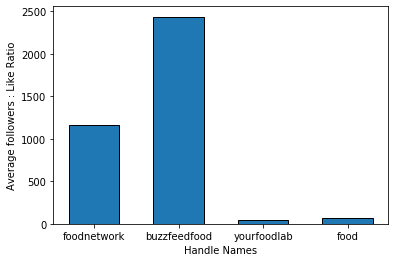

In [89]:
plt.bar(Top_5_handle[:4], avg_followers_like_ratio[:4], width=0.6, edgecolor='black')
plt.ylabel('Average followers : Like Ratio')
plt.xlabel('Handle Names')
plt.show()